In [1]:
# Assignment: DSC540 Final Project
# Name: Bezawada, Sashidhar
# Date: 2023-03-01
# Milestone 2 : Cleaning/Formatting Flat File Source
# Milestone 3 : Cleaning/Formatting Website Data
# Milestone 4 : Connecting to an API/Pulling in the Data and Cleaning/Formatting
# Milestone 5 : Merging the Data and Storing in a Database/Visualizing Data

## Milestone 2
### Perform at least 5 data transformation and/or cleansing steps to your flat file data. For example:
1. Replace Headers
2. Format data into a more readable format
3. Identify outliers and bad data
4. Find duplicates
5. Fix casing or inconsistent values
6. Conduct Fuzzy Matching

### Reading in flat files

In [2]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#salaries_by_region.csv
#Reading flat files into DataFrame object
salaries_region = pd.read_csv("datasets/salaries-by-region.csv")
print(salaries_region.head())

                                School Name      Region  \
0                       Stanford University  California   
1  California Institute of Technology (CIT)  California   
2                       Harvey Mudd College  California   
3        University of California, Berkeley  California   
4                        Occidental College  California   

  Starting Median Salary Mid-Career Median Salary  \
0             $70,400.00              $129,000.00   
1             $75,500.00              $123,000.00   
2             $71,800.00              $122,000.00   
3             $59,900.00              $112,000.00   
4             $51,900.00              $105,000.00   

  Mid-Career 10th Percentile Salary Mid-Career 25th Percentile Salary  \
0                        $68,400.00                        $93,100.00   
1                               NaN                       $104,000.00   
2                               NaN                        $96,000.00   
3                        $59,500.0

In [4]:
#salaries_by_region.csv
#Reading flat files into DataFrame object
salaries_college_type = pd.read_csv("datasets/salaries-by-college-type.csv")
print(salaries_college_type.head())

                                    School Name  School Type  \
0   Massachusetts Institute of Technology (MIT)  Engineering   
1      California Institute of Technology (CIT)  Engineering   
2                           Harvey Mudd College  Engineering   
3  Polytechnic University of New York, Brooklyn  Engineering   
4                                  Cooper Union  Engineering   

  Starting Median Salary Mid-Career Median Salary  \
0             $72,200.00              $126,000.00   
1             $75,500.00              $123,000.00   
2             $71,800.00              $122,000.00   
3             $62,400.00              $114,000.00   
4             $62,200.00              $114,000.00   

  Mid-Career 10th Percentile Salary Mid-Career 25th Percentile Salary  \
0                        $76,800.00                        $99,200.00   
1                               NaN                       $104,000.00   
2                               NaN                        $96,000.00   
3   

## Merging 2 Salaries Flat Files

In [5]:
salaries_merged = pd.merge(salaries_region,salaries_college_type,on='School Name')
salaries_merged.head()

,School Name,Region,Starting Median Salary_x,Mid-Career Median Salary_x,Mid-Career 10th Percentile Salary_x,Mid-Career 25th Percentile Salary_x,Mid-Career 75th Percentile Salary_x,Mid-Career 90th Percentile Salary_x,School Type,Starting Median Salary_y,Mid-Career Median Salary_y,Mid-Career 10th Percentile Salary_y,Mid-Career 25th Percentile Salary_y,Mid-Career 75th Percentile Salary_y,Mid-Career 90th Percentile Salary_y
0,California Institute of Technology (CIT),California,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN,Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
1,Harvey Mudd College,California,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
2,"University of California, Berkeley",California,"$59,900.00","$112,000.00","$59,500.00","$81,000.00","$149,000.00","$201,000.00",State,"$59,900.00","$112,000.00","$59,500.00","$81,000.00","$149,000.00","$201,000.00"
3,Occidental College,California,"$51,900.00","$105,000.00",NaN,"$54,800.00","$157,000.00",NaN,Liberal Arts,"$51,900.00","$105,000.00",NaN,"$54,800.00","$157,000.00",NaN
4,Cal Poly San Luis Obispo,California,"$57,200.00","$101,000.00","$55,000.00","$74,700.00","$133,000.00","$178,000.00",State,"$57,200.00","$101,000.00","$55,000.00","$74,700.00","$133,000.00","$178,000.00"


## Removing Duplicate and Unncessary Columns

For the percentile columns, we have values for the 10th, 25th, 50th, 75th, and 90th percentiles. Given that we can find the interquartile range for a dataset by using Q3 (75th) and Q1 (25th), I don't think we will need the 10th and 90th percentile fields. The IQR will give us a good idea of statistical dispersion, and is commonly used as a robust measure of scale.

I am also going to drop the 10th and 90th percentile columns from the first DataFrame.

In [6]:
#removing second set of salary columns as they contain same data from first dataframe
salaries_merged = salaries_merged.drop(['Mid-Career 10th Percentile Salary_x','Mid-Career 90th Percentile Salary_x','Starting Median Salary_y','Mid-Career 10th Percentile Salary_y','Mid-Career 25th Percentile Salary_y','Mid-Career 75th Percentile Salary_y','Mid-Career 90th Percentile Salary_y','Mid-Career Median Salary_y'],axis='columns')

In [7]:
print(salaries_merged.head())

                                School Name      Region  \
0  California Institute of Technology (CIT)  California   
1                       Harvey Mudd College  California   
2        University of California, Berkeley  California   
3                        Occidental College  California   
4                  Cal Poly San Luis Obispo  California   

  Starting Median Salary_x Mid-Career Median Salary_x  \
0               $75,500.00                $123,000.00   
1               $71,800.00                $122,000.00   
2               $59,900.00                $112,000.00   
3               $51,900.00                $105,000.00   
4               $57,200.00                $101,000.00   

  Mid-Career 25th Percentile Salary_x Mid-Career 75th Percentile Salary_x  \
0                         $104,000.00                         $161,000.00   
1                          $96,000.00                         $180,000.00   
2                          $81,000.00                         $149,000.

## Rearranging Columns in Merged DataFrame

In [8]:
#retrieve columns of the merged dataframe in list form
cols = salaries_merged.columns.tolist()
cols

['School Name',
 'Region',
 'Starting Median Salary_x',
 'Mid-Career Median Salary_x',
 'Mid-Career 25th Percentile Salary_x',
 'Mid-Career 75th Percentile Salary_x',
 'School Type']

In [9]:
#reassign cols list in the order wanted
cols = ['School Name','Region','School Type','Starting Median Salary_x','Mid-Career Median Salary_x','Mid-Career 25th Percentile Salary_x','Mid-Career 75th Percentile Salary_x']
salaries_merged = salaries_merged[cols]

In [10]:
print(salaries_merged.head())

                                School Name      Region   School Type  \
0  California Institute of Technology (CIT)  California   Engineering   
1                       Harvey Mudd College  California   Engineering   
2        University of California, Berkeley  California         State   
3                        Occidental College  California  Liberal Arts   
4                  Cal Poly San Luis Obispo  California         State   

  Starting Median Salary_x Mid-Career Median Salary_x  \
0               $75,500.00                $123,000.00   
1               $71,800.00                $122,000.00   
2               $59,900.00                $112,000.00   
3               $51,900.00                $105,000.00   
4               $57,200.00                $101,000.00   

  Mid-Career 25th Percentile Salary_x Mid-Career 75th Percentile Salary_x  
0                         $104,000.00                         $161,000.00  
1                          $96,000.00                         $180

## Renaming Existing Columns

In [11]:
salaries_merged = salaries_merged.rename(columns={'School Name':'school_name','School Type':'school_type','Starting Median Salary_x':'starting_median_salary','Mid-Career Median Salary_x':'midCareer_median_salary','Mid-Career 25th Percentile Salary_x':'midCareer_25th_salary','Mid-Career 75th Percentile Salary_x':'midCareer_75th_salary'})

In [12]:
print(salaries_merged.head())

                                school_name      Region   school_type  \
0  California Institute of Technology (CIT)  California   Engineering   
1                       Harvey Mudd College  California   Engineering   
2        University of California, Berkeley  California         State   
3                        Occidental College  California  Liberal Arts   
4                  Cal Poly San Luis Obispo  California         State   

  starting_median_salary midCareer_median_salary midCareer_25th_salary  \
0             $75,500.00             $123,000.00           $104,000.00   
1             $71,800.00             $122,000.00            $96,000.00   
2             $59,900.00             $112,000.00            $81,000.00   
3             $51,900.00             $105,000.00            $54,800.00   
4             $57,200.00             $101,000.00            $74,700.00   

  midCareer_75th_salary  
0           $161,000.00  
1           $180,000.00  
2           $149,000.00  
3           

## Checking for Duplicates

In [13]:
#can check for duplicates using pandas duplicated function on each column

#for loop through each column in dataframe
print("Checking for duplicates in DataFrame\n")
for col in salaries_merged.columns:
    print(col + ": " + str(any(salaries_merged[col].duplicated())))

Checking for duplicates in DataFrame

school_name: True
Region: True
school_type: True
starting_median_salary: True
midCareer_median_salary: True
midCareer_25th_salary: True
midCareer_75th_salary: True


## #####################################################
There are duplicates in the 'school_name' column which is not ideal as this is technically the key for our DataFrame and each record for each School Name should be unique.

I am going to investigate the duplicates in this column.

In [14]:
#looking at the duplicate values in the school_name column
salaries_merged[salaries_merged.duplicated(['school_name'], keep=False)]

#20 schools show up twice in the dataframe

,school_name,Region,school_type,starting_median_salary,midCareer_median_salary,midCareer_25th_salary,midCareer_75th_salary
11,"University of California, Santa Barbara (UCSB)",California,Party,"$50,500.00","$95,000.00","$71,200.00","$129,000.00"
12,"University of California, Santa Barbara (UCSB)",California,State,"$50,500.00","$95,000.00","$71,200.00","$129,000.00"
34,Arizona State University (ASU),Western,Party,"$47,400.00","$84,100.00","$60,700.00","$114,000.00"
35,Arizona State University (ASU),Western,State,"$47,400.00","$84,100.00","$60,700.00","$114,000.00"
68,University of Illinois at Urbana-Champaign (UIUC),Midwestern,Party,"$52,900.00","$96,100.00","$68,900.00","$132,000.00"
69,University of Illinois at Urbana-Champaign (UIUC),Midwestern,State,"$52,900.00","$96,100.00","$68,900.00","$132,000.00"
80,"Indiana University (IU), Bloomington",Midwestern,Party,"$46,300.00","$84,000.00","$60,400.00","$119,000.00"
81,"Indiana University (IU), Bloomington",Midwestern,State,"$46,300.00","$84,000.00","$60,400.00","$119,000.00"
82,University of Iowa (UI),Midwestern,Party,"$44,700.00","$83,900.00","$61,100.00","$116,000.00"
83,University of Iowa (UI),Midwestern,State,"$44,700.00","$83,900.00","$61,100.00","$116,000.00"


## Removing Duplicates

In [15]:
#sort dataframe by key, school_name
salaries_merged = salaries_merged.sort_values("school_name")

In [16]:
#create new dataframe and drop duplicates
#keep = 'first' --> keep the first occurrence of the duplicate and remove the other one, leave one unique record
salaries_unique = salaries_merged.drop_duplicates(subset="school_name",keep='first')

In [17]:
orig_size = salaries_merged.shape
new_size = salaries_unique.shape

In [18]:
print("Original size before removing duplicates: " + str(orig_size))

Original size before removing duplicates: (268, 7)


In [19]:
print("New size after removing duplicates: " + str(new_size))

New size after removing duplicates: (248, 7)


## Identifying Missing Values

In [20]:
#loop through columns in dataframe
#check for any NaN values
for col in salaries_unique.columns:
    print(col + ": " + str(salaries_unique[col].isnull().values.any()))



school_name: False
Region: False
school_type: False
starting_median_salary: False
midCareer_median_salary: False
midCareer_25th_salary: False
midCareer_75th_salary: False


#no missing values!

## Describing Data & Checking field types

In [21]:
#describing our dataframe with duplicates removed
salaries_unique.describe()

,school_name,Region,school_type,starting_median_salary,midCareer_median_salary,midCareer_25th_salary,midCareer_75th_salary
count,248,248,248,248,248,248,248
unique,248,5,5,145,166,178,110
top,Amherst College,Northeastern,State,"$42,600.00","$72,100.00","$54,100.00","$106,000.00"
freq,1,67,164,6,5,5,7


In [22]:
salaries_unique.dtypes

school_name                object
Region                     object
school_type                object
starting_median_salary     object
midCareer_median_salary    object
midCareer_25th_salary      object
midCareer_75th_salary      object
dtype: object

All of the columns in our dataframe are of the Object type. We will need to cast the salary fields to be of type 'numeric', so we can properly work with them and apply functions/transformations.

## Casting Variables

In [23]:
#removing special characters from the salary fields so they can be cast to numeric
for col in ['starting_median_salary','midCareer_median_salary','midCareer_25th_salary','midCareer_75th_salary']:
    salaries_unique[col] = salaries_unique[col].str.replace(',','')
    salaries_unique[col] = salaries_unique[col].str.replace('$','')
    salaries_unique[col] = salaries_unique[col].str.replace('\.00','')

C:\Users\sashi_000\AppData\Local\Temp\ipykernel_14228\3381551435.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salaries_unique[col] = salaries_unique[col].str.replace(',','')
C:\Users\sashi_000\AppData\Local\Temp\ipykernel_14228\3381551435.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  salaries_unique[col] = salaries_unique[col].str.replace('$','')
C:\Users\sashi_000\AppData\Local\Temp\ipykernel_14228\3381551435.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [24]:
salaries_unique[["starting_median_salary", "midCareer_median_salary",'midCareer_25th_salary',"midCareer_75th_salary"]] = salaries_unique[["starting_median_salary", "midCareer_median_salary",'midCareer_25th_salary',"midCareer_75th_salary"]].apply(pd.to_numeric)

C:\Users\sashi_000\AppData\Local\Temp\ipykernel_14228\1749195220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salaries_unique[["starting_median_salary", "midCareer_median_salary",'midCareer_25th_salary',"midCareer_75th_salary"]] = salaries_unique[["starting_median_salary", "midCareer_median_salary",'midCareer_25th_salary',"midCareer_75th_salary"]].apply(pd.to_numeric)


## Identifying Outliers

In [25]:
salaries_unique.head()

,school_name,Region,school_type,starting_median_salary,midCareer_median_salary,midCareer_25th_salary,midCareer_75th_salary
214,Amherst College,Northeastern,Liberal Arts,54500,107000,84900,162000
189,Appalachian State University,Southern,State,40400,69100,50400,90800
34,Arizona State University (ASU),Western,Party,47400,84100,60700,114000
194,Arkansas State University (ASU),Southern,State,38700,63300,45300,83900
149,Auburn University,Southern,State,45400,84700,62700,109000


<AxesSubplot:xlabel='starting_median_salary'>

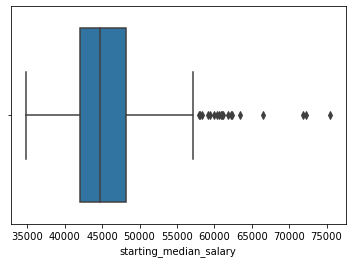

In [26]:
#boxplot of salary columns

#Starting Median Salary
sns.boxplot(x=salaries_unique['starting_median_salary'])

<AxesSubplot:xlabel='midCareer_median_salary'>

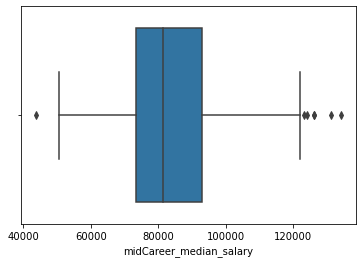

In [27]:
#Mid-Career Median Salary
sns.boxplot(x=salaries_unique['midCareer_median_salary'])

<AxesSubplot:xlabel='midCareer_25th_salary'>

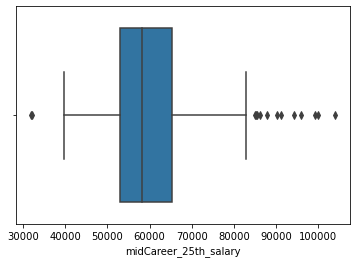

In [28]:
#Mid-Career 25th Percentile Salary
sns.boxplot(x=salaries_unique['midCareer_25th_salary'])

<AxesSubplot:xlabel='midCareer_75th_salary'>

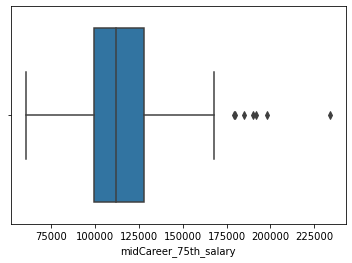

In [29]:
#Mid-Career 75th Percentile Salary
sns.boxplot(x=salaries_unique['midCareer_75th_salary'])

While there are outlier points shown in all of the above boxplots, I don't view any of them as being outliers.

Salary is a monetary value that varies immensely, especially depending on one's area of expertise, age, years working, etc. I think universities develop students who then go into many different career areas, which generate different degrees of salaries, and so, I don't think any of these salary values can be considered as outliers.

I think all of them will be useful in this analysis of understanding how universities can have an impact on the career and money that one makes post-grad.

## Removing Parantheses from School Names

In [30]:
salaries_unique['school_name'] = salaries_unique['school_name'].str.replace(r"\s*\([^()]*\)","").str.strip()

C:\Users\sashi_000\AppData\Local\Temp\ipykernel_14228\3747198713.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  salaries_unique['school_name'] = salaries_unique['school_name'].str.replace(r"\s*\([^()]*\)","").str.strip()
C:\Users\sashi_000\AppData\Local\Temp\ipykernel_14228\3747198713.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salaries_unique['school_name'] = salaries_unique['school_name'].str.replace(r"\s*\([^()]*\)","").str.strip()


In [31]:
salaries_unique.head()

,school_name,Region,school_type,starting_median_salary,midCareer_median_salary,midCareer_25th_salary,midCareer_75th_salary
214,Amherst College,Northeastern,Liberal Arts,54500,107000,84900,162000
189,Appalachian State University,Southern,State,40400,69100,50400,90800
34,Arizona State University,Western,Party,47400,84100,60700,114000
194,Arkansas State University,Southern,State,38700,63300,45300,83900
149,Auburn University,Southern,State,45400,84700,62700,109000


## #############################################################################

## Milestone 3 - Cleaning/Formatting Website Data

### Perform at least 5 data transformation and/or cleansing steps to your flat file data. For example:
1. Replace Headers
2. Format data into a more readable format
3. Identify outliers and bad data
4. Find duplicates
5. Fix casing or inconsistent values
6. Conduct Fuzzy Matching

### Reading in Website Data

In [32]:
#needed libraries
import requests
import lxml.html as lh
import pandas as pd

#function to fetch the rows of the rankings table from the website I found
#the rows can be found between the <tr> tags in the underlying HTML
def get_tableData_Pages():
    #target we want to open
    URL = ['https://oedb.org/rankings/acceptance-rate/','https://oedb.org/rankings/acceptance-rate/page/2/#table-rankings','https://oedb.org/rankings/acceptance-rate/page/3/#table-rankings','https://oedb.org/rankings/acceptance-rate/page/4/#table-rankings','https://oedb.org/rankings/acceptance-rate/page/5/#table-rankings','https://oedb.org/rankings/acceptance-rate/page/6/#table-rankings']
    
    tr_pages = []
    
    for url in range(0,6):
        #open with GET method
        resp=requests.get(URL[url])
    
        #check for response 200 -> OK
        if resp.status_code==200:
            print("Successfully opened the web page")
            print("Fetching elements")
      
            #store the contents of the website under a doc
            doc = lh.fromstring(resp.content)
        
            #parse data that are stored between <tr> tags of HTML --> each row in the table
            tr_elements = doc.xpath('//tr')
            
            tr_pages.append(tr_elements)
        else:
            print("Error")
        
    return tr_pages

In [33]:
tr_pages = get_tableData_Pages()

Successfully opened the web page
Fetching elements
Successfully opened the web page
Fetching elements
Successfully opened the web page
Fetching elements
Successfully opened the web page
Fetching elements
Successfully opened the web page
Fetching elements
Successfully opened the web page
Fetching elements


## Parsing the Table Header

In [34]:
#function to fetch the rows of the rankings table from the website I found
#the rows can be found between the <tr> tags in the underlying HTML
def get_tableData():
    #target we want to open
    url = 'https://oedb.org/rankings/acceptance-rate/'
    #open with GET method
    resp=requests.get(url)
    
    #check for response 200 -> OK
    if resp.status_code==200:
        print("Successfully opened the web page")
        print("Fetching elements")
      
        #store the contents of the website under a doc
        doc = lh.fromstring(resp.content)
        
        #parse data that are stored between <tr> tags of HTML --> each row in the table
        tr_elements = doc.xpath('//tr')
        
        return tr_elements
    else:
        print("Error")

In [35]:
tr_elements = get_tableData()

Successfully opened the web page
Fetching elements


In [36]:
#Create empty list
col=[]
i=0
#For each row, store each first element (header) and an empty list
for t in tr_elements[0]:
    i+=1
    #getting the text for the various columns
    name=t.text_content()
    #output column number and column text
    print (i,name)
    col.append((name,[]))

1 Rank
2 School
3 Student to Faculty Ratio
4 Graduation Rate
5 Retention Rate
6 Acceptance Rate
7 Enrollment Rate
8 Institutional Aid Rate
9 Default Rate


## Creating Pandas DataFrame

In [37]:
#go through each table on each page of the website
for tbody in tr_pages:
    #first row is the header, data is stored from the second row onwards
    #loop through each row in each table
    for j in range(1,len(tbody)):
        #T is our j'th row
        T=tbody[j]
    
       # If row is not of size 15, the //tr data is not from our table 
        if len(T)!=15:
            break
        
        #selecting first 9 elements since they align with headers --> other columns are fluff
        T = T[:9]
    
        #i is the index of our column
        i=0
    
        #Iterate through each element of the row
        for t in T:
            data=t.text_content() 
            #Check if row is empty
            if i>0:
            #Convert any numerical value to integers
                try:
                    data=int(data)
                except:
                    pass
            #Append the data to the empty list of the i'th column
            col[i][1].append(data)
            #Increment i for the next column
            i+=1

In [38]:
#creating the dataframe from a dict --> dict will hold the column name and the designated values that fall into it for each school
Dict={title:column for (title,column) in col}
df=pd.DataFrame(Dict)

In [39]:
print(f"{df.shape[0]} rows and {df.shape[1]} columns")

571 rows and 9 columns


In [40]:
df.head()

,Rank,School,Student to Faculty Ratio,Graduation Rate,Retention Rate,Acceptance Rate,Enrollment Rate,Institutional Aid Rate,Default Rate
0,1,Harvard University,7 to 1,98%,98%,6%,4%,44%,N/A
1,2,Yale University,6 to 1,97%,99%,7%,5%,52%,N/A
2,3,University of Pennsylvania,6 to 1,95%,98%,10%,7%,54%,N/A
3,4,Johns Hopkins University,10 to 1,94%,97%,14%,5%,51%,N/A
4,5,Cornell University,9 to 1,93%,97%,15%,8%,55%,N/A


In [41]:
df.tail()

,Rank,School,Student to Faculty Ratio,Graduation Rate,Retention Rate,Acceptance Rate,Enrollment Rate,Institutional Aid Rate,Default Rate
566,567,Touro University Worldwide,13 to 1,N/A,100%,N/A,N/A,76%,4%
567,568,Unitek College,16 to 1,N/A,100%,N/A,N/A,20%,N/A
568,569,University of Western States,16 to 1,88%,N/A,N/A,N/A,56%,N/A
569,570,Virginia Baptist College,5 to 1,100%,25%,N/A,N/A,38%,N/A
570,571,West Virginia Junior College-Morgantown,25 to 1,53%,69%,N/A,N/A,88%,N/A


## Renaming Column Names

In [42]:
#renaming the columns with spaces so they are easier to call/access
#ratio, rate columns
df = df.rename(columns={'Student to Faculty Ratio':'Stud_Fac_Ratio','Graduation Rate':'Grad_Rate','Retention Rate':'Reten_Rate','Acceptance Rate':'Accept_Rate','Enrollment Rate':'Enroll_Rate','Institutional Aid Rate':'Inst_Aid_Rate','Default Rate':'Default_Rate'})


In [43]:
#looking at the first of data, new columns are shown
df.iloc[0]

Rank                               1
School            Harvard University
Stud_Fac_Ratio                7 to 1
Grad_Rate                        98%
Reten_Rate                       98%
Accept_Rate                       6%
Enroll_Rate                       4%
Inst_Aid_Rate                    44%
Default_Rate                     N/A
Name: 0, dtype: object

## Finding Duplicates

In [44]:
#using the DataFrame method duplicated to determine whether each row is a duplicate
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
566    False
567    False
568    False
569    False
570    False
Length: 571, dtype: bool

In [45]:
#count the number of duplicates
df.duplicated().sum()

0

In [46]:
print("No duplicates were found! All unique rows were loaded into the Data Frame")

No duplicates were found! All unique rows were loaded into the Data Frame


In [47]:
## Finding Missing Data

In [48]:
#loop through columns in dataframe
#check for any NaN values
for col in df.columns:
    print(col + ": " + str(df[col].isnull().values.any()))

Rank: False
School: False
Stud_Fac_Ratio: False
Grad_Rate: False
Reten_Rate: False
Accept_Rate: False
Enroll_Rate: False
Inst_Aid_Rate: False
Default_Rate: False


In [49]:
print("No missing data was found, but I can see NA's in the dataset. Going to look into those!")

No missing data was found, but I can see NA's in the dataset. Going to look into those!


## Replacing N/A values with np.NaN

In [50]:
#replacing N/A values with np.NaN so they are recognized as missing values
df = df.replace('N/A',np.NaN)

In [51]:
#checking for missing data again now that NaN values are in place
for col in df.columns:
    print(col + ": " + str(df[col].isnull().values.any()))

Rank: False
School: False
Stud_Fac_Ratio: False
Grad_Rate: True
Reten_Rate: True
Accept_Rate: True
Enroll_Rate: True
Inst_Aid_Rate: False
Default_Rate: True


In [52]:
print("Multiple columns have missing data: Graduation Rate, Retention Rate, Acceptance Rate, Enrollment Rate, and Default Rate")

Multiple columns have missing data: Graduation Rate, Retention Rate, Acceptance Rate, Enrollment Rate, and Default Rate


In [53]:
#getting counts of missing values in data frame
df.isnull().sum()

Rank                0
School              0
Stud_Fac_Ratio      0
Grad_Rate           6
Reten_Rate          4
Accept_Rate        29
Enroll_Rate        29
Inst_Aid_Rate       0
Default_Rate      291
dtype: int64

## Checking & Changing Data Types

In [54]:
#using dtypes function to find data types
df.dtypes

Rank              object
School            object
Stud_Fac_Ratio    object
Grad_Rate         object
Reten_Rate        object
Accept_Rate       object
Enroll_Rate       object
Inst_Aid_Rate     object
Default_Rate      object
dtype: object

In [55]:
#The rate columns are marked as type 'object'. I am going to cast them to be numeric, so we can utilize the numerical values as they represent rates in percentages.

In [56]:
def percent_to_float(col):
    df[col] = df[col].str.rstrip('%').astype('float')/100.0

In [57]:
for col in ['Grad_Rate','Reten_Rate','Accept_Rate','Enroll_Rate','Inst_Aid_Rate','Default_Rate']:
    percent_to_float(col)

In [58]:
df.dtypes

Rank               object
School             object
Stud_Fac_Ratio     object
Grad_Rate         float64
Reten_Rate        float64
Accept_Rate       float64
Enroll_Rate       float64
Inst_Aid_Rate     float64
Default_Rate      float64
dtype: object

In [59]:
df.head()

,Rank,School,Stud_Fac_Ratio,Grad_Rate,Reten_Rate,Accept_Rate,Enroll_Rate,Inst_Aid_Rate,Default_Rate
0,1,Harvard University,7 to 1,0.98,0.98,0.06,0.04,0.44,NaN
1,2,Yale University,6 to 1,0.97,0.99,0.07,0.05,0.52,NaN
2,3,University of Pennsylvania,6 to 1,0.95,0.98,0.10,0.07,0.54,NaN
3,4,Johns Hopkins University,10 to 1,0.94,0.97,0.14,0.05,0.51,NaN
4,5,Cornell University,9 to 1,0.93,0.97,0.15,0.08,0.55,NaN


Now that the rate values are classified as being of type 'float', we can replace any missing values with aggregated numerical values so as to best fit with the type of the columns.

## Filling Missing Values

In [60]:
#fill the missing Default Rate data with median value
#round median values to two decimal places for percentage purposes
def fill_na_median(data, inplace=True):
    return data.fillna(round(data.median(),2), inplace=inplace)

In [61]:
#Default Rate has the most missing values, 291 of them. This count is over half of the total size (number of rows) of the Data Frame. I am going to replace these with the median value for Default Rate, so we can handle any outliers as well.

In [62]:
#median value for Default Rate
print('Median Default Rate: ' + str(df['Default_Rate'].median()))

Median Default Rate: 0.06


In [63]:
fill_na_median(df['Default_Rate'])

In [64]:
df['Default_Rate']

0      0.06
1      0.06
2      0.06
3      0.06
4      0.06
       ... 
566    0.04
567    0.06
568    0.06
569    0.06
570    0.06
Name: Default_Rate, Length: 571, dtype: float64

In [65]:
#median values
print('Median Graduation Rate: ' + str(df['Grad_Rate'].median())) #0.66
print('Median Retention Rate: ' + str(df['Reten_Rate'].median())) #0.83
print('Median Acceptance Rate: ' + str(df['Accept_Rate'].median())) #0.65
print('Median Enrollment Rate: ' + str(df['Enroll_Rate'].median())) #0.18

Median Graduation Rate: 0.66
Median Retention Rate: 0.83
Median Acceptance Rate: 0.645
Median Enrollment Rate: 0.18


In [66]:
#fill in rest of missing data with median values
fill_na_median(df['Grad_Rate'])
fill_na_median(df['Reten_Rate'])
fill_na_median(df['Accept_Rate'])
fill_na_median(df['Enroll_Rate'])

In [67]:
#checking to make sure we handled all missing data
#getting counts of missing values in data frame
df.isnull().sum()

Rank              0
School            0
Stud_Fac_Ratio    0
Grad_Rate         0
Reten_Rate        0
Accept_Rate       0
Enroll_Rate       0
Inst_Aid_Rate     0
Default_Rate      0
dtype: int64

Number of missing values in each column is now 0! We handled the missing data for the rate columns by replacing any missing data with the median value for the columns. The median will allow us to get a value which accounts for outliers, rather than taking the mean.

## Detecting and Filtering Outliers

In [68]:
#describing the data
#gives us an idea of the distribution
df.describe()

,Grad_Rate,Reten_Rate,Accept_Rate,Enroll_Rate,Inst_Aid_Rate,Default_Rate
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,0.657653,0.827968,0.628546,0.201156,0.719772,0.060893
std,0.130232,0.085167,0.172070,0.120338,0.179739,0.021236
min,0.350000,0.250000,0.060000,0.040000,0.060000,0.010000
25%,0.560000,0.780000,0.530000,0.120000,0.580000,0.060000
50%,0.660000,0.830000,0.650000,0.180000,0.740000,0.060000
75%,0.740000,0.880000,0.750000,0.240000,0.870000,0.060000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.200000


## Boxplots of Numerical Fields
### Graduation Rate

<AxesSubplot:xlabel='Grad_Rate'>

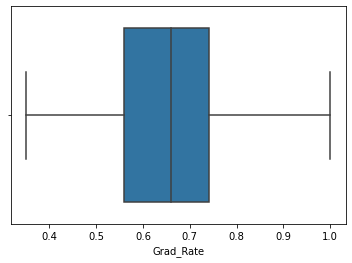

In [69]:
#boxplot of Graduation Rate

#Graduation Rate
sns.boxplot(x=df['Grad_Rate'])

The Graduation Rate is relatively normally distributed. The median value (represented by the vertical line) is pretty much in the middle of the box, which represents the interquartile range for the column. I am pleased with the distribution, and there are no apparent outliers that need to be removed.

## Retention Rate

<AxesSubplot:xlabel='Reten_Rate'>

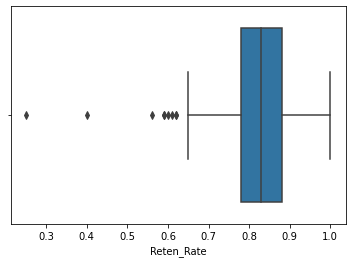

In [70]:
#boxplot of Retention Rate

#Retention Rate
sns.boxplot(x=df['Reten_Rate'])

The outlier values for Retention Rate fall below ~0.65 or 65%. The minimum is 0.25 or a 25% retention rate, which I think is low for an university but it makes sense from the perspective of university.

This low retention rate can show how there are universities which experience difficulty in keeping students after freshman year, since I'm sure that is a blocker that many schools experience.

In terms of giving us information in regards to how one's university influences their post-grad salary, I think that knowing if the university they attended experiences trouble with retaining students, then it could give more influence to the student for graduating and still staying at the school.

## Acceptance Rate

<AxesSubplot:xlabel='Accept_Rate'>

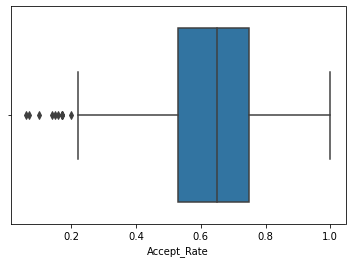

In [71]:
#boxplot of Acceptance Rate

#Acceptance Rate
sns.boxplot(x=df['Accept_Rate'])

There are acceptance rate outlier values, which fall below about 0.2 or 20% acceptance rate.

Values falling below this are not surprising as many Ivy League schools have a low acceptance rate, since they are prestigious and more difficult to attend/get into.

Therefore, I will not be removing these outliers that fall below ~0.2 as they give representation to the schools that are more difficult to get accepted into given their prestige.

## Enrollment Rate
### Removing Outliers

<AxesSubplot:xlabel='Enroll_Rate'>

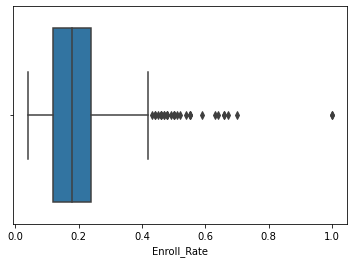

In [72]:
#boxplot of Enrollment Rate

#Enrollment Rate
sns.boxplot(x=df['Enroll_Rate'])

Enrollment rate represents the percentage of 18-to-24-year-olds enrolled as undergraduate or graduate students in 2- or 4- year institutions.

The outlier values for this field come above ~0.4 or 40% enrollment rate. There are universities with a higher amount of students enrolled in their courses/programs, which is good for that university!

However, for the outlier value at basically 1.0 or 100%, that is difficult for me to fathom that an university has 100% of its original students enrolled for school attendance. It would be very impressive of them, but I am viewing this university with this enrollment rate as an outlier. I am going to remove it.

In [73]:
#finding row with enrollment rate greater than 0.8
df[df.Enroll_Rate > 0.8]

,Rank,School,Stud_Fac_Ratio,Grad_Rate,Reten_Rate,Accept_Rate,Enroll_Rate,Inst_Aid_Rate,Default_Rate
539,540,Luther Rice University & Seminary,23 to 1,1.00,1.0,1.0,1.0,0.65,0.06
541,542,Midwives College of Utah,5 to 1,0.66,1.0,1.0,1.0,0.30,0.06


In [74]:
#removing these two rows with 1.0 Enroll_Rate
df = df[df.Enroll_Rate <= 0.8]

In [75]:
print(df.shape)
print("New shape: 569 rows and 9 columns")

(569, 9)
New shape: 569 rows and 9 columns


In [76]:
## Institutional Aid Rate

<AxesSubplot:xlabel='Inst_Aid_Rate'>

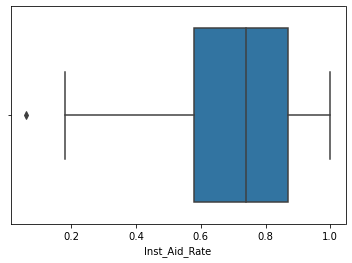

In [77]:
#boxplot of Institutional Aid Rate

#Institutional Aid Rate
sns.boxplot(x=df['Inst_Aid_Rate'])

 Institutional Aid Rate: what percentage of college students get financial aid?

There is a designated outlier in this distribution that is less than about 0.15 or 15%. It looks like it is almost at 0.0. Let's look into the rows.

The designated row actually has an Institutional Aid Rate of 6%, which means that 6% of their college students receive financial aid. This percentage is small, but it could designate that the students don't need financial aid or the university is not equipped/prepared to give it out.

In terms of our business problem of identifying salaries based on university attendance, this could designate that the students from this university are either not in need or they are using other ways to receive aid while in school.

I am going to keep this row in; its other values are representative of data that we want to look into as well.

## Default Rate

<AxesSubplot:xlabel='Default_Rate'>

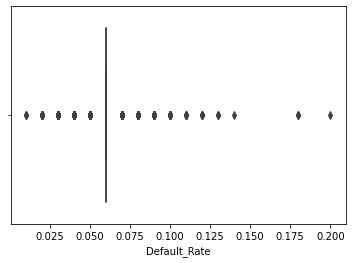

In [78]:
#boxplot of Default Rate

#Default Rate
sns.boxplot(x=df['Default_Rate'])

Default rate is the percentage of all outstanding loans that a lender has written off as unpaid after a prolonged period of missed payments. In terms of how this relates to an univeristy, it would present the percentage of graduates that default on their student loans in the first 12 months of repayment.

I think this rate value is definitely indicative of how students are doing post-graduation in terms of their incomes/finances, because paying off loans is a huge financial responsibility for students and young adults.

Since the majority of the values in this Default Rate column were replaced with the median value of 0.06, the distribution is not very well distributed and shows any values outside of the median as outliers.

In order to keep variety and distribution for the column, I will not remove any of the outliers as we need to represent the values that do not fall into the median bucket that was used for replacement.

In [79]:
df.head()

,Rank,School,Stud_Fac_Ratio,Grad_Rate,Reten_Rate,Accept_Rate,Enroll_Rate,Inst_Aid_Rate,Default_Rate
0,1,Harvard University,7 to 1,0.98,0.98,0.06,0.04,0.44,0.06
1,2,Yale University,6 to 1,0.97,0.99,0.07,0.05,0.52,0.06
2,3,University of Pennsylvania,6 to 1,0.95,0.98,0.10,0.07,0.54,0.06
3,4,Johns Hopkins University,10 to 1,0.94,0.97,0.14,0.05,0.51,0.06
4,5,Cornell University,9 to 1,0.93,0.97,0.15,0.08,0.55,0.06


## Converting Categorical Data to Numerical Data

The Student to Faculty Ratio column is marked as being of object type since it represents the ratio values in string form, i.e. "7 to 1".

I am going to create a new column which represents the ratios in numerical form by dividing the first number in the ratio by the second number.

In [80]:
#function to retreieve the numbers in the ratio field from around "to"
#divides the two numbers that come from the split by eachother
#returns numerical ratio
def convertRatio(x):
    a,b = x.split('to')
    c = int(a)/int(b)
    return c

In [81]:
#create new column in DataFrame --> Student:Faculty Ratio as a number
#applies the above function on the object column from the original df
df['Stud_Fac_Ratio_Num'] = df['Stud_Fac_Ratio'].apply(convertRatio)

In [82]:
#new ratio number column
df['Stud_Fac_Ratio_Num']

0       7.0
1       6.0
2       6.0
3      10.0
4       9.0
       ... 
566    13.0
567    16.0
568    16.0
569     5.0
570    25.0
Name: Stud_Fac_Ratio_Num, Length: 569, dtype: float64

In [83]:
#view first 5 rows in data frame with new column
df.head()

,Rank,School,Stud_Fac_Ratio,Grad_Rate,Reten_Rate,Accept_Rate,Enroll_Rate,Inst_Aid_Rate,Default_Rate,Stud_Fac_Ratio_Num
0,1,Harvard University,7 to 1,0.98,0.98,0.06,0.04,0.44,0.06,7.0
1,2,Yale University,6 to 1,0.97,0.99,0.07,0.05,0.52,0.06,6.0
2,3,University of Pennsylvania,6 to 1,0.95,0.98,0.10,0.07,0.54,0.06,6.0
3,4,Johns Hopkins University,10 to 1,0.94,0.97,0.14,0.05,0.51,0.06,10.0
4,5,Cornell University,9 to 1,0.93,0.97,0.15,0.08,0.55,0.06,9.0


## Putting Numerical Ratio Column next to Categorical Ratio Column

In [84]:
df = df[['Rank','School','Stud_Fac_Ratio','Stud_Fac_Ratio_Num','Grad_Rate','Reten_Rate','Accept_Rate','Enroll_Rate','Inst_Aid_Rate','Default_Rate']]

In [85]:
#rearrangement of columns --> view
df.head()

,Rank,School,Stud_Fac_Ratio,Stud_Fac_Ratio_Num,Grad_Rate,Reten_Rate,Accept_Rate,Enroll_Rate,Inst_Aid_Rate,Default_Rate
0,1,Harvard University,7 to 1,7.0,0.98,0.98,0.06,0.04,0.44,0.06
1,2,Yale University,6 to 1,6.0,0.97,0.99,0.07,0.05,0.52,0.06
2,3,University of Pennsylvania,6 to 1,6.0,0.95,0.98,0.10,0.07,0.54,0.06
3,4,Johns Hopkins University,10 to 1,10.0,0.94,0.97,0.14,0.05,0.51,0.06
4,5,Cornell University,9 to 1,9.0,0.93,0.97,0.15,0.08,0.55,0.06


## Checking for Outliers in Numerical Ratio field

<AxesSubplot:xlabel='Stud_Fac_Ratio_Num'>

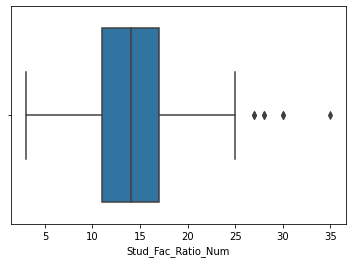

In [86]:
#boxplot of Student:Faculty Ratio as a number

#Stud_Fac_Ratio_Num
sns.boxplot(x=df['Stud_Fac_Ratio_Num'])

In [87]:
df['Stud_Fac_Ratio_Num'].describe()

count    569.000000
mean      14.270650
std        4.297543
min        3.000000
25%       11.000000
50%       14.000000
75%       17.000000
max       35.000000
Name: Stud_Fac_Ratio_Num, dtype: float64

The distribution of values for student to faculty ratio is relatively normally distrubted, with the median value basically being in the middle of the interquartile range. The majority of values fall between 3.0 and 25.0 (3 students to 1 teacher, 25 students to 1 teacher).

There are outlier values shown that come above 25. However, it is not unlikely for some universities to have larger class sizes, especially depending on the overall class population, type of class, number of professors, etc.

I will not be removing these marked outliers from the boxplot.

## Dropping Unneeded Columns
Since we don't need the categorical and the numerical columns for representing student to faculty ratio, I am going to drop the categorical one from the copied dataset so we can have all numerical columns, which is helpful for modeling!

In [88]:
#taking a copy of the dataframe with the certain columns removed
df_dropped = df.drop(['Stud_Fac_Ratio'],axis=1)

In [89]:
#print shape of the new dataframe --> should be same as original since we are essentially replacing a column
print(df_dropped.shape)
print("569 rows and 9 columns. Same as original shape!")

(569, 9)
569 rows and 9 columns. Same as original shape!


In [90]:
print(df_dropped.head())

  Rank                      School  Stud_Fac_Ratio_Num  Grad_Rate  Reten_Rate  \
0    1          Harvard University                 7.0       0.98        0.98   
1    2             Yale University                 6.0       0.97        0.99   
2    3  University of Pennsylvania                 6.0       0.95        0.98   
3    4    Johns Hopkins University                10.0       0.94        0.97   
4    5          Cornell University                 9.0       0.93        0.97   

   Accept_Rate  Enroll_Rate  Inst_Aid_Rate  Default_Rate  
0         0.06         0.04           0.44          0.06  
1         0.07         0.05           0.52          0.06  
2         0.10         0.07           0.54          0.06  
3         0.14         0.05           0.51          0.06  
4         0.15         0.08           0.55          0.06  


## Ethical Implication of data from the Website data 

Accountability of the College rankings is not considered as part of the data collection via the Website data sources used in this dataset.



## Milestone 4

### Step #1: Connecting to an API/Pulling in the Data and Cleaning/Formatting

In [91]:
#import required libaries
import urllib.parse
import urllib.error
import json
import os
import certifi
import ssl
from urllib.request import Request, urlopen
import requests

Load the secret API key from a JSON file stored in the same folder in a variable, by using json.loads

In [92]:
#converting text file to JSON
filename = 'datasets/APIkeys.txt'
#dictionary where the lines from text will be stored
dict1 = {}
#creating dictionary
with open(filename) as fh:
    for line in fh:
        #read each line and trim of extra spaces, only gets words
        command, description = line.strip().split(None,1)
        dict1[command]=description.strip()
        
#create JSON file
out_file = open("datasets/APIkeys_college.json","w")
json.dump(dict1,out_file,indent=4,sort_keys=False)
out_file.close()

Open the APIkeys.json file

In [93]:
#open the APIkeys.json file which holds api key
with open('datasets/APIkeys_college.json') as f:
    keys = json.load(f)
    #retrieve API key to feed into URL
    schoolkey = keys['Collegeapi']

In [94]:
apikey = schoolkey

Putting together URL with API Key

In [95]:
#The College Scorecard API is a GET API that lives at http://api.data.gov/ed/collegescorecard/
#The endpoint for querying all data is /v1/schools
base_url = "https://api.data.gov/ed/collegescorecard/v1/schools?"
complete_url = f"{base_url}api_key={apikey}&fields="
complete_url

'https://api.data.gov/ed/collegescorecard/v1/schools?api_key=Xvz2dA3c3GQFSMVTf3d7XldyIW0aDfP0Gp1PSPIr&fields='

Defining Search Conditions for the URL query

In [96]:
# List of all the search conditions
parameters = ["&school.degrees_awarded.predominant=3",
             "&school.operating=1"
             ]

# Appending all the conditions values to construct the conditionss_url
parameters_url = ""
for parameter in parameters:
    parameters_url = parameters_url + parameter
parameters_url

'&school.degrees_awarded.predominant=3&school.operating=1'

## Step #2: Define Header
### Pulling Needed Fields from College Scorecard Data & Renaming Columns

In [97]:
# Dictionary all the desired fields
year = "latest"
#renaming columns and pulling wanted ones for df
fields = {
          # School Category
          "School_Name": "school.name",
          "School_ID": "id",
          "School_State": "school.state",
          "School_Ownership": "school.ownership",
          "Full_time_Faculty_Rate": "school.ft_faculty_rate",
          "Faculty_avg_sal_monthly": "school.faculty_salary",
          # Student Category
          "Stud_Enroll_Size": year + ".student.size",
          "Stud_Enroll_All": year + ".student.enrollment.all",
          "percent_male_stud": year + ".student.demographics.men",
          "percent_fem_stud": year + ".student.demographics.women",
          "4_yr_retention": year + ".student.retention_rate.four_year.full_time",
          #Cost Category
          "Attendance_Cost_per_Year": year + ".cost.attendance.academic_year",
          # Completion Category
          "150%_Completion_Rate_4Yr": year + ".completion.completion_rate_4yr_150nt",
          # Admissions Category 
          "Admission_Rate": year + ".admissions.admission_rate.overall",
          "SAT_Avg_Overall": year + ".admissions.sat_scores.average.overall",
          "SAT_75th_Percentile_Math": year + ".admissions.sat_scores.75th_percentile.math",
          "SAT_75th_Percentile_Reading": year + ".admissions.sat_scores.75th_percentile.critical_reading",
          "SAT_75th_Percentile_Writing": year + ".admissions.sat_scores.75th_percentile.writing",
          ## Earnings Category
          # 6 Years after Enrollment:
          "Mean_Earnings_6yrs": year + ".earnings.6_yrs_after_entry.working_not_enrolled.mean_earnings",
          "Mean_male_earning_6yrs)": year + ".earnings.6_yrs_after_entry.mean_earnings.male_students",
          "Mean_fem_earning_6yrs": year + ".earnings.6_yrs_after_entry.mean_earnings.female_students",
          "std_earning_6yrs": year + ".earnings.6_yrs_after_entry.working_not_enrolled.std_dev",
          "percent_above_25k_6yrs": year + ".earnings.6_yrs_after_entry.percent_greater_than_25000",
          "low_income_6yrs": year + ".earnings.6_yrs_after_entry.working_not_enrolled.income.lowest_tercile",
          "medium_income_6yrs": year + ".earnings.6_yrs_after_entry.working_not_enrolled.income.middle_tercile",
          "high_income_6yrs": year + ".earnings.6_yrs_after_entry.working_not_enrolled.income.highest_tercile",
          "low_mean_earn_6yrs": year + ".earnings.6_yrs_after_entry.mean_earnings.lowest_tercile",
          "med_mean_earn_6yrs": year + ".earnings.6_yrs_after_entry.mean_earnings.middle_tercile",
          "high_mean_earn_6yrs": year + ".earnings.6_yrs_after_entry.mean_earnings.highest_tercile",
          # 10 Years after Enrollment:
          "Mean_Earnings_10yrs": year + ".earnings.10_yrs_after_entry.working_not_enrolled.mean_earnings",
          "Mean_male_earn_10yrs": year + ".earnings.10_yrs_after_entry.mean_earnings.male_students",
          "Mean_fem_earn_10yrs": year + ".earnings.10_yrs_after_entry.mean_earnings.female_students",
          "std_earn_10yrs": year + ".earnings.10_yrs_after_entry.working_not_enrolled.std_dev",
          "percent_above_25k_10years": year + ".earnings.10_yrs_after_entry.percent_greater_than_25000",
          "low_income_10yrs": year + ".earnings.10_yrs_after_entry.working_not_enrolled.income.lowest_tercile",
          "medium_income_10yrs": year + ".earnings.10_yrs_after_entry.working_not_enrolled.income.middle_tercile",
          "high_income_10yrs": year + ".earnings.10_yrs_after_entry.working_not_enrolled.income.highest_tercile",
          "low_mean_earn_10yrs": year + ".earnings.10_yrs_after_entry.mean_earnings.lowest_tercile",
          "med_mean_earn_10yrs": year + ".earnings.10_yrs_after_entry.mean_earnings.middle_tercile",
          "high_mean_earn_10yrs": year + ".earnings.10_yrs_after_entry.mean_earnings.highest_tercile"
         }

# Appending all the fields values to construct the fields_url
fields_url = ""
for key, val in fields.items():
    fields_url = fields_url + val + ","

# To remove the extra "," at the end of fields_url
fields_url = fields_url[:-1]
fields_url

'school.name,id,school.state,school.ownership,school.ft_faculty_rate,school.faculty_salary,latest.student.size,latest.student.enrollment.all,latest.student.demographics.men,latest.student.demographics.women,latest.student.retention_rate.four_year.full_time,latest.cost.attendance.academic_year,latest.completion.completion_rate_4yr_150nt,latest.admissions.admission_rate.overall,latest.admissions.sat_scores.average.overall,latest.admissions.sat_scores.75th_percentile.math,latest.admissions.sat_scores.75th_percentile.critical_reading,latest.admissions.sat_scores.75th_percentile.writing,latest.earnings.6_yrs_after_entry.working_not_enrolled.mean_earnings,latest.earnings.6_yrs_after_entry.mean_earnings.male_students,latest.earnings.6_yrs_after_entry.mean_earnings.female_students,latest.earnings.6_yrs_after_entry.working_not_enrolled.std_dev,latest.earnings.6_yrs_after_entry.percent_greater_than_25000,latest.earnings.6_yrs_after_entry.working_not_enrolled.income.lowest_tercile,latest.earnings

In [98]:
# Getting number of records returned to set the max page number
query_url = f"{complete_url}{fields_url}{parameters_url}&page=0"
response = requests.get(query_url).json()
#finding max number of pages that will need to be looked through for retrieving data
max_page_num = response["metadata"]["total"]//100 + 1
max_page_num

20

Putting API Data into a DataFrame

In [99]:
# Constructing the dataframe from the API request response

#Initializing variables
school_df = []
per_page = 100

#looping through each page in the dataset and retrieving 100 records from each page
for page_num in range(0,max_page_num):
    query_url = f"{complete_url}{fields_url}{parameters_url}&page={page_num}&_per_page={per_page}"
    #make GET request to the URL --> return JSON object
    response = requests.get(query_url).json()
    
    #retrieving records from the JSON object
    for x in range(len(response["results"])):
        result_row = {}
        
        for key, val in fields.items(): 
            try:
                result_row[key] = response["results"][x][val]
            except KeyError:
                print(f"{key} key not found")
        #append rows to the array which will become the DataFrame
        school_df.append(result_row)

#create DataFrame from array variable data        
school_df = pd.DataFrame(school_df)

In [100]:
school_df.head()

,School_Name,School_ID,School_State,School_Ownership,Full_time_Faculty_Rate,Faculty_avg_sal_monthly,Stud_Enroll_Size,Stud_Enroll_All,percent_male_stud,percent_fem_stud,...,Mean_male_earn_10yrs,Mean_fem_earn_10yrs,std_earn_10yrs,percent_above_25k_10years,low_income_10yrs,medium_income_10yrs,high_income_10yrs,low_mean_earn_10yrs,med_mean_earn_10yrs,high_mean_earn_10yrs
0,Alabama A & M University,100654,AL,1,0.9960,7599.0,5090.0,None,0.3978,0.6022,...,38500.0,32600.0,25400.0,0.599,459.0,337.0,166.0,33000.0,37300.0,39500.0
1,University of Alabama at Birmingham,100663,AL,1,0.7619,11380.0,13549.0,None,0.3816,0.6184,...,57400.0,43200.0,39200.0,0.747,1304.0,911.0,649.0,47000.0,49500.0,49300.0
2,University of Alabama in Huntsville,100706,AL,1,0.6702,9697.0,7825.0,None,0.5891,0.4109,...,58700.0,46000.0,33600.0,0.779,682.0,454.0,378.0,47000.0,55500.0,55100.0
3,Alabama State University,100724,AL,1,0.6797,7194.0,3603.0,None,0.3605,0.6395,...,33000.0,28300.0,21400.0,0.528,1519.0,548.0,151.0,29000.0,32500.0,34300.0
4,The University of Alabama,100751,AL,1,0.7707,10349.0,30610.0,None,0.4417,0.5583,...,59100.0,45100.0,42500.0,0.786,1424.0,1545.0,2024.0,45500.0,51600.0,55800.0


In [101]:
#checking shape of school_df 
print(f"{school_df.shape[0]} rows and {school_df.shape[1]} columns")

1989 rows and 40 columns


### Step #3: Making Column Names Lowercase

In [102]:
#make all columns in school_df lowercase
school_df.columns = school_df.columns.str.lower()

This step helps with data usability, since it is easier to type and manage the column names when they are lower-case!

### Step #4: Checking and Casting Field Types

In [103]:
print(school_df.dtypes)

school_name                     object
school_id                        int64
school_state                    object
school_ownership                 int64
full_time_faculty_rate         float64
faculty_avg_sal_monthly        float64
stud_enroll_size               float64
stud_enroll_all                 object
percent_male_stud              float64
percent_fem_stud               float64
4_yr_retention                 float64
attendance_cost_per_year       float64
150%_completion_rate_4yr       float64
admission_rate                 float64
sat_avg_overall                float64
sat_75th_percentile_math       float64
sat_75th_percentile_reading    float64
sat_75th_percentile_writing    float64
mean_earnings_6yrs             float64
mean_male_earning_6yrs)        float64
mean_fem_earning_6yrs          float64
std_earning_6yrs               float64
percent_above_25k_6yrs         float64
low_income_6yrs                float64
medium_income_6yrs             float64
high_income_6yrs         

I notice that the 'School Ownership' is defined as an int64 column. I am going to look into it, as I suspect that it is a categorical column, and it would be helpful to know what the numerical values correspond to in terms of classes.

In [104]:
school_df['school_ownership'].unique()

array([1, 2, 3], dtype=int64)

There are three distinct numerical values for the 'School Ownership' column: 1,2,3. This column corresponds to the control of the institution in terms of public vs. private. I am going to create a new column which aligns the numerical values with their categories/string names.

1 = Public

2 = Private Non-Profit

3 = Private For-Profit

In [105]:
# Updating School Ownership 1: "Public", 2: "Private NonProfit", 3: "Private ForProfit"}
school_df.loc[school_df["school_ownership"] == 1, "school_ownership_cat"] = "Public"
school_df.loc[school_df["school_ownership"] == 2, "school_ownership_cat"] = "Private NonProfit"
school_df.loc[school_df["school_ownership"] == 3, "school_ownership_cat"] = "Private ForProfit"

In [106]:
school_df['school_ownership_cat']

0                  Public
1                  Public
2                  Public
3                  Public
4                  Public
              ...        
1984    Private ForProfit
1985               Public
1986    Private NonProfit
1987    Private ForProfit
1988    Private ForProfit
Name: school_ownership_cat, Length: 1989, dtype: object

In [107]:
school_df['school_ownership_cat'].unique()

array(['Public', 'Private NonProfit', 'Private ForProfit'], dtype=object)

### Step #5: Finding Duplicates

In [108]:
#using the DataFrame method duplicated to determine whether each row is a duplicate
school_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1984    False
1985    False
1986    False
1987    False
1988    False
Length: 1989, dtype: bool

In [109]:
#using the DataFrame method duplicated to determine whether each row is a duplicate
#how many duplicate rows are there?
school_df.duplicated().sum()

0

No duplicates were found in the DataFrame containing the College Scorecard API data!

### Step #6: Finding Missing Data

In [110]:
#loop through columns in dataframe
#check for any NaN values
for col in school_df.columns:
    print(col + ": " + str(school_df[col].isnull().values.any()))

school_name: False
school_id: False
school_state: False
school_ownership: False
full_time_faculty_rate: True
faculty_avg_sal_monthly: True
stud_enroll_size: True
stud_enroll_all: True
percent_male_stud: True
percent_fem_stud: True
4_yr_retention: True
attendance_cost_per_year: True
150%_completion_rate_4yr: True
admission_rate: True
sat_avg_overall: True
sat_75th_percentile_math: True
sat_75th_percentile_reading: True
sat_75th_percentile_writing: True
mean_earnings_6yrs: True
mean_male_earning_6yrs): True
mean_fem_earning_6yrs: True
std_earning_6yrs: True
percent_above_25k_6yrs: True
low_income_6yrs: True
medium_income_6yrs: True
high_income_6yrs: True
low_mean_earn_6yrs: True
med_mean_earn_6yrs: True
high_mean_earn_6yrs: True
mean_earnings_10yrs: True
mean_male_earn_10yrs: True
mean_fem_earn_10yrs: True
std_earn_10yrs: True
percent_above_25k_10years: True
low_income_10yrs: True
medium_income_10yrs: True
high_income_10yrs: True
low_mean_earn_10yrs: True
med_mean_earn_10yrs: True
high_m

In [111]:
#finding number of missing values in columns with missing data
#getting counts of missing values in data frame
school_df.isnull().sum()

school_name                       0
school_id                         0
school_state                      0
school_ownership                  0
full_time_faculty_rate          144
faculty_avg_sal_monthly          43
stud_enroll_size                  1
stud_enroll_all                1989
percent_male_stud                 1
percent_fem_stud                  1
4_yr_retention                  144
attendance_cost_per_year        173
150%_completion_rate_4yr        149
admission_rate                  355
sat_avg_overall                 888
sat_75th_percentile_math        933
sat_75th_percentile_reading     933
sat_75th_percentile_writing    1303
mean_earnings_6yrs              252
mean_male_earning_6yrs)         415
mean_fem_earning_6yrs           415
std_earning_6yrs                252
percent_above_25k_6yrs          267
low_income_6yrs                 227
medium_income_6yrs              253
high_income_6yrs                346
low_mean_earn_6yrs              429
med_mean_earn_6yrs          

Given that the column 'Student Enrollment All' has 2006 missing values, which is also equal to the number of rows in the dataset, I am going to drop this column since we won't know how to fill it and it is not providing us with any information/data.

### Drop 'Student Enrollment All'

In [112]:
school_df = school_df.drop(['stud_enroll_all'],axis=1)

In [113]:
school_df.shape

(1989, 40)

In [114]:
print("One less column in the DataFrame ... Student Enrollment All has been removed")

One less column in the DataFrame ... Student Enrollment All has been removed


### Step #7: Filling Numerical Missing Values

From looking over the numerical (float) values currently in the DataFrame, most of them pertain to some 'mean' value that has already been calculated for the universities. Therefore, for filling the missing values in these columns, I'm going to take the mean of all of the values and use this as the filler. This will help align with the measurement of the values already in the dataset.

In [115]:
#fill the missing Default Rate data with mean value
#round mean values to two decimal places for percentage purposes
def fill_na_mean(data, inplace=True):
    return data.fillna(round(data.mean(),2), inplace=inplace)

In [116]:
for col in school_df[school_df.columns[school_df.isnull().any()]].columns:
    print("Col: " + col)
    fill_na_mean(school_df[col])

Col: full_time_faculty_rate
Col: faculty_avg_sal_monthly
Col: stud_enroll_size
Col: percent_male_stud
Col: percent_fem_stud
Col: 4_yr_retention
Col: attendance_cost_per_year
Col: 150%_completion_rate_4yr
Col: admission_rate
Col: sat_avg_overall
Col: sat_75th_percentile_math
Col: sat_75th_percentile_reading
Col: sat_75th_percentile_writing
Col: mean_earnings_6yrs
Col: mean_male_earning_6yrs)
Col: mean_fem_earning_6yrs
Col: std_earning_6yrs
Col: percent_above_25k_6yrs
Col: low_income_6yrs
Col: medium_income_6yrs
Col: high_income_6yrs
Col: low_mean_earn_6yrs
Col: med_mean_earn_6yrs
Col: high_mean_earn_6yrs
Col: mean_earnings_10yrs
Col: mean_male_earn_10yrs
Col: mean_fem_earn_10yrs
Col: std_earn_10yrs
Col: percent_above_25k_10years
Col: low_income_10yrs
Col: medium_income_10yrs
Col: high_income_10yrs
Col: low_mean_earn_10yrs
Col: med_mean_earn_10yrs
Col: high_mean_earn_10yrs


In [117]:
#check for any missing values again --> verify that they were handled accordingly
school_df.isnull().sum()

school_name                    0
school_id                      0
school_state                   0
school_ownership               0
full_time_faculty_rate         0
faculty_avg_sal_monthly        0
stud_enroll_size               0
percent_male_stud              0
percent_fem_stud               0
4_yr_retention                 0
attendance_cost_per_year       0
150%_completion_rate_4yr       0
admission_rate                 0
sat_avg_overall                0
sat_75th_percentile_math       0
sat_75th_percentile_reading    0
sat_75th_percentile_writing    0
mean_earnings_6yrs             0
mean_male_earning_6yrs)        0
mean_fem_earning_6yrs          0
std_earning_6yrs               0
percent_above_25k_6yrs         0
low_income_6yrs                0
medium_income_6yrs             0
high_income_6yrs               0
low_mean_earn_6yrs             0
med_mean_earn_6yrs             0
high_mean_earn_6yrs            0
mean_earnings_10yrs            0
mean_male_earn_10yrs           0
mean_fem_e

There is no more missing data in school_df!

### Step #8: Detecting and Filtering Outliers

In [118]:
#describing the data
school_df.describe()

,school_id,school_ownership,full_time_faculty_rate,faculty_avg_sal_monthly,stud_enroll_size,percent_male_stud,percent_fem_stud,4_yr_retention,attendance_cost_per_year,150%_completion_rate_4yr,...,mean_male_earn_10yrs,mean_fem_earn_10yrs,std_earn_10yrs,percent_above_25k_10years,low_income_10yrs,medium_income_10yrs,high_income_10yrs,low_mean_earn_10yrs,med_mean_earn_10yrs,high_mean_earn_10yrs
count,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,...,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000
mean,221860.171443,1.786828,0.649581,7774.438371,4499.895877,0.435578,0.562914,0.741637,36848.783278,0.540866,...,57827.537798,44910.859789,37021.723399,0.738261,1070.319578,760.757426,531.228034,46853.208477,50295.516541,54919.166591
std,105646.223896,0.570756,0.264050,2719.708348,8236.804871,0.185990,0.186505,0.147408,16428.250068,0.201899,...,17855.974868,12302.712268,14809.099786,0.109567,5062.322676,2804.973873,1013.313615,16188.756463,11654.081934,12440.263632
min,100654.000000,1.000000,0.000000,547.000000,0.000000,0.000000,0.000000,0.000000,5663.000000,0.000000,...,22200.000000,18000.000000,13800.000000,0.090000,16.000000,16.000000,16.000000,20500.000000,23200.000000,24700.000000
25%,156189.000000,1.000000,0.473100,6172.000000,639.000000,0.353000,0.502500,0.682900,23327.000000,0.428600,...,49600.000000,38300.000000,28800.000000,0.701000,116.000000,140.000000,122.000000,38600.000000,44300.000000,48000.000000
50%,195544.000000,2.000000,0.650000,7532.000000,1614.000000,0.422400,0.577400,0.750000,35697.000000,0.540000,...,57827.540000,44910.860000,35200.000000,0.742000,304.000000,316.000000,307.000000,46853.210000,50295.520000,54919.170000
75%,229018.000000,2.000000,0.874600,9179.000000,4499.900000,0.496800,0.646300,0.830900,47197.000000,0.666700,...,60100.000000,47400.000000,39700.000000,0.803000,1070.320000,760.760000,531.230000,48000.000000,52300.000000,57600.000000
max,496326.000000,3.000000,1.000000,21143.000000,109233.000000,1.000000,1.000000,1.000000,81531.000000,1.000000,...,219100.000000,142200.000000,170800.000000,0.957000,95499.000000,52661.000000,16229.000000,188300.000000,136200.000000,172100.000000


array([[<AxesSubplot:title={'center':'school_id'}>,
        <AxesSubplot:title={'center':'school_ownership'}>,
        <AxesSubplot:title={'center':'full_time_faculty_rate'}>,
        <AxesSubplot:title={'center':'faculty_avg_sal_monthly'}>,
        <AxesSubplot:title={'center':'stud_enroll_size'}>,
        <AxesSubplot:title={'center':'percent_male_stud'}>],
       [<AxesSubplot:title={'center':'percent_fem_stud'}>,
        <AxesSubplot:title={'center':'4_yr_retention'}>,
        <AxesSubplot:title={'center':'attendance_cost_per_year'}>,
        <AxesSubplot:title={'center':'150%_completion_rate_4yr'}>,
        <AxesSubplot:title={'center':'admission_rate'}>,
        <AxesSubplot:title={'center':'sat_avg_overall'}>],
       [<AxesSubplot:title={'center':'sat_75th_percentile_math'}>,
        <AxesSubplot:title={'center':'sat_75th_percentile_reading'}>,
        <AxesSubplot:title={'center':'sat_75th_percentile_writing'}>,
        <AxesSubplot:title={'center':'mean_earnings_6yrs'}>,
    

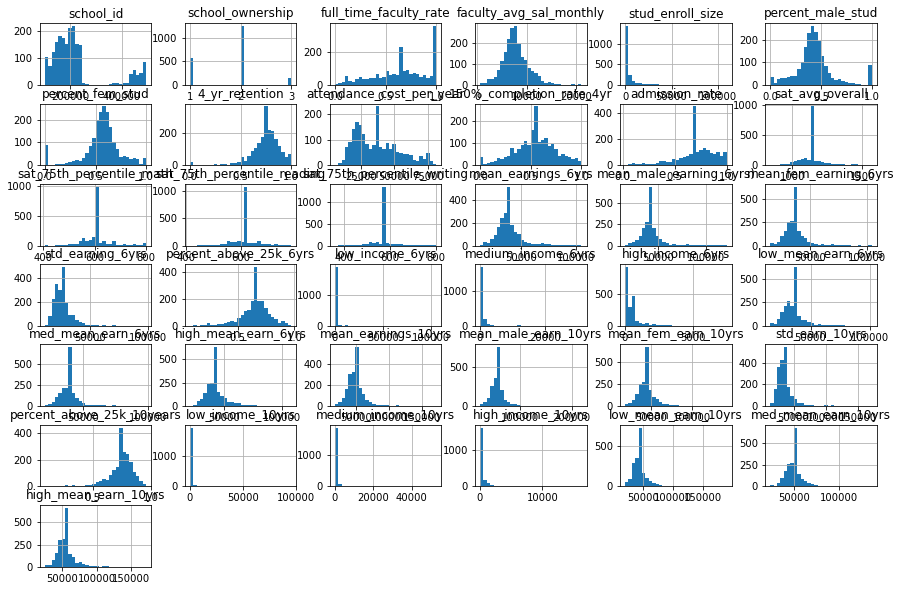

In [119]:
#plotting histograms of numerical columns
school_df.hist(bins=30, figsize=(15, 10))

Looking at Outliers in percent_male_stud and percent_female_stud

<AxesSubplot:xlabel='percent_male_stud'>

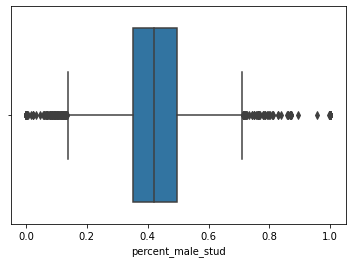

In [120]:
#boxplot of percent_male_stud

#Percentage of Male Students
sns.boxplot(x=school_df['percent_male_stud'])

<AxesSubplot:xlabel='percent_fem_stud'>

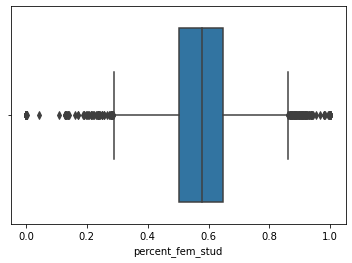

In [121]:
#boxplot of percent_female_stud

#Percentage of Female Students
sns.boxplot(x=school_df['percent_fem_stud'])

From analyzing these boxplots of the fields 'percent_male_stud' and 'percent_fem_stud', there are outliers at the extremes of both percentage scales. For the percentage of male students, I notice distinct outliers above ~.92. For the percentage of female students, I notice distinct outliers less than ~0.05.

Therefore, universities with almost all male students are outliers in this dataset, and universities with barely any female datasets are outliers in this dataset. These correspond with eachother!

There are single-sex universities, and I am sure they boast some advantage to receiving this type of education in terms of gender in classes. I don't want to remove any of these from the dataset, because it could give insights into how one's peer demographics influence their education and "success" in college.

Closer Look into Distribution of 'Attendance_Cost_per_Year'

<AxesSubplot:xlabel='attendance_cost_per_year'>

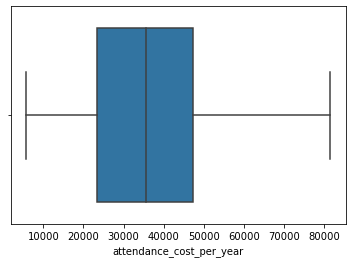

In [122]:
sns.boxplot(x=school_df['attendance_cost_per_year'])

No distinct outliers for this field! I wanted to take a closer look since there was a spike in the histogram which seemed out of place for the distribution of the rest of the values. I think this spike is due to the replacement of missing values at the mean, which would lead to such a central focus in the spread of the data

Closer Look into Post- 10 Year Earnings

<AxesSubplot:xlabel='low_mean_earn_10yrs'>

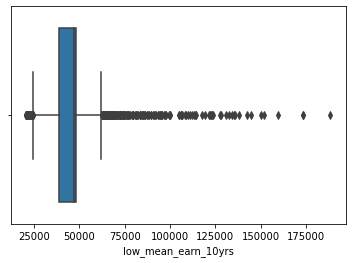

In [123]:
#boxplot for the lowest tercile of the mean earnings 10 years post-grad
#contains the lowest third of the population
sns.boxplot(x=school_df['low_mean_earn_10yrs'])

<AxesSubplot:xlabel='med_mean_earn_10yrs'>

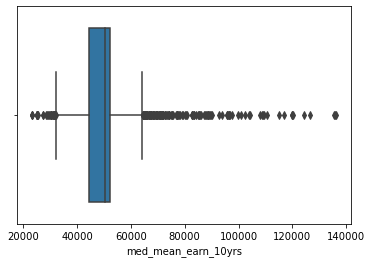

In [124]:
#boxplot for the middle/medium tercile of the mean earnings 10 years post-grad
#middle third of the earnings population
sns.boxplot(x=school_df['med_mean_earn_10yrs'])

<AxesSubplot:xlabel='high_mean_earn_10yrs'>

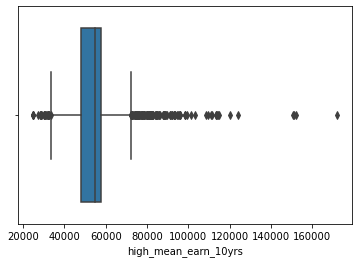

In [125]:
#boxplot for the highest tercile of the mean earnings 10 years post-grad
#highest third of the earnings population
sns.boxplot(x=school_df["high_mean_earn_10yrs"])

Terciles represent either of the two points that divide an ordered distribution into three parts, each containing a third of the population. In the case for the mean earnings 10-years post graduation, the distribution was divided into three parts: lowest, middle and highest mean earnings.

There is an overlap in the means for the terciles and also their interquartile ranges, which represents that the groups are not very different from each other.

In terms of outliers, there are quite a lot of them in all three of the terciles/variables. Most are above about $70,000. It is difficult with earnings, and this is also what I'm trying to investigate, because people and careers make such different levels of money. It is highly dependent on many factors: industry, career role, location, level in a company, etc. Therefore, I don't want to remove any of the outliers, since these could be key in showing how one's university/education influences the range of earnings/salary that one can make post-grad.

## Milestone 5

Now that you have cleaned and transformed your 3 datasets, you need to load them into a database. You can choose what kind of database (SQLLite or MySQL, Postgre SQL are all free options). You will want to load each dataset into SQL Lite as an individual table and then you must join the datasets together in Python into 1 dataset.

Once all the data is merged together in your database, create 5 visualizations that demonstrate the data you have cleansed. You should have at least 2 visualizations that have data from more than one source (meaning, if you have 3 tables, you must have visualizations that span across 2 of the tables – you are also welcome to use your consolidated dataset that you created in the previous step, if you do that, you have met this requirement).

For the visualization portion of the project, you are welcome to use a python library like Matplotlib, Seaborn, or an R package ggPlot2, Plotly, or Tableau/PowerBI.

PowerBI is a free tool that could be used – Tableau only has a free web author. If your use Tableau/PowerBI you need to submit a PDF with your assignment vs the Tableau/PowerBI file. /p>

Clearly label each visualization. Submit your code for merging and storing in the database, with your code for the visualizations along with a 250-500-word summary of what you learned and had to do to complete the project. In your write-up, make sure to address the ethical implications of cleansing data and your project topic. You can submit a Jupyter Notebook or a PDF of your code. If you submit a .py file you need to also include a PDF or attachment of your results.

### Column Names in Each Dataset

In [126]:
#salaries_unique
salaries_unique.columns

Index(['school_name', 'Region', 'school_type', 'starting_median_salary',
       'midCareer_median_salary', 'midCareer_25th_salary',
       'midCareer_75th_salary'],
      dtype='object')

In [127]:
#df_dropped
df_dropped.columns

Index(['Rank', 'School', 'Stud_Fac_Ratio_Num', 'Grad_Rate', 'Reten_Rate',
       'Accept_Rate', 'Enroll_Rate', 'Inst_Aid_Rate', 'Default_Rate'],
      dtype='object')

In [128]:
#school_df
school_df.columns

Index(['school_name', 'school_id', 'school_state', 'school_ownership',
       'full_time_faculty_rate', 'faculty_avg_sal_monthly', 'stud_enroll_size',
       'percent_male_stud', 'percent_fem_stud', '4_yr_retention',
       'attendance_cost_per_year', '150%_completion_rate_4yr',
       'admission_rate', 'sat_avg_overall', 'sat_75th_percentile_math',
       'sat_75th_percentile_reading', 'sat_75th_percentile_writing',
       'mean_earnings_6yrs', 'mean_male_earning_6yrs)',
       'mean_fem_earning_6yrs', 'std_earning_6yrs', 'percent_above_25k_6yrs',
       'low_income_6yrs', 'medium_income_6yrs', 'high_income_6yrs',
       'low_mean_earn_6yrs', 'med_mean_earn_6yrs', 'high_mean_earn_6yrs',
       'mean_earnings_10yrs', 'mean_male_earn_10yrs', 'mean_fem_earn_10yrs',
       'std_earn_10yrs', 'percent_above_25k_10years', 'low_income_10yrs',
       'medium_income_10yrs', 'high_income_10yrs', 'low_mean_earn_10yrs',
       'med_mean_earn_10yrs', 'high_mean_earn_10yrs', 'school_ownership_cat'],

In [129]:
### Shapes of Each Dataset

In [130]:
salaries_unique.shape

(248, 7)

In [131]:
df_dropped.shape

(569, 9)

In [132]:
school_df.shape

(1989, 40)

### Loading datasets into individual tables

In [133]:
#import SQLite library
import sqlite3 as sql

salaries_unique DataFrame --> salaries-by-region.csv

In [134]:
#open a connection to a new database for all data
conn = sql.connect('datasets/university_salary.db')

In [135]:
#create a new table in the univ_data database for CSV data
salaries_unique.to_sql('grad_salaries',conn,if_exists='replace')

248

In [136]:
#testing table connection
grad_salaries = pd.read_sql('SELECT * FROM grad_salaries',conn)

In [137]:
grad_salaries.head()

,index,school_name,Region,school_type,starting_median_salary,midCareer_median_salary,midCareer_25th_salary,midCareer_75th_salary
0,214,Amherst College,Northeastern,Liberal Arts,54500,107000,84900,162000
1,189,Appalachian State University,Southern,State,40400,69100,50400,90800
2,34,Arizona State University,Western,Party,47400,84100,60700,114000
3,194,Arkansas State University,Southern,State,38700,63300,45300,83900
4,149,Auburn University,Southern,State,45400,84700,62700,109000


 df_dropped --> 'https://oedb.org/rankings/acceptance-rate/'

In [138]:
#cgrad_salaries.head()reate new table in database for website data
df_dropped.to_sql('univ_rates',conn,if_exists='replace')

569

In [139]:
#testing table connection
univ_rates_file = pd.read_sql('SELECT * FROM univ_rates',conn)

In [140]:
univ_rates_file.head()

,index,Rank,School,Stud_Fac_Ratio_Num,Grad_Rate,Reten_Rate,Accept_Rate,Enroll_Rate,Inst_Aid_Rate,Default_Rate
0,0,1,Harvard University,7.0,0.98,0.98,0.06,0.04,0.44,0.06
1,1,2,Yale University,6.0,0.97,0.99,0.07,0.05,0.52,0.06
2,2,3,University of Pennsylvania,6.0,0.95,0.98,0.10,0.07,0.54,0.06
3,3,4,Johns Hopkins University,10.0,0.94,0.97,0.14,0.05,0.51,0.06
4,4,5,Cornell University,9.0,0.93,0.97,0.15,0.08,0.55,0.06


school_df --> API data "https://api.data.gov/ed/collegescorecard/v1/schools?"

In [141]:
#create new table in database for API data
school_df.to_sql('schools',conn,if_exists='replace')

1989

In [142]:
#testing table connection
schools_file = pd.read_sql('SELECT * FROM schools',conn)

In [143]:
schools_file.head()

,index,school_name,school_id,school_state,school_ownership,full_time_faculty_rate,faculty_avg_sal_monthly,stud_enroll_size,percent_male_stud,percent_fem_stud,...,mean_fem_earn_10yrs,std_earn_10yrs,percent_above_25k_10years,low_income_10yrs,medium_income_10yrs,high_income_10yrs,low_mean_earn_10yrs,med_mean_earn_10yrs,high_mean_earn_10yrs,school_ownership_cat
0,0,Alabama A & M University,100654,AL,1,0.9960,7599.0,5090.0,0.3978,0.6022,...,32600.0,25400.0,0.599,459.0,337.0,166.0,33000.0,37300.0,39500.0,Public
1,1,University of Alabama at Birmingham,100663,AL,1,0.7619,11380.0,13549.0,0.3816,0.6184,...,43200.0,39200.0,0.747,1304.0,911.0,649.0,47000.0,49500.0,49300.0,Public
2,2,University of Alabama in Huntsville,100706,AL,1,0.6702,9697.0,7825.0,0.5891,0.4109,...,46000.0,33600.0,0.779,682.0,454.0,378.0,47000.0,55500.0,55100.0,Public
3,3,Alabama State University,100724,AL,1,0.6797,7194.0,3603.0,0.3605,0.6395,...,28300.0,21400.0,0.528,1519.0,548.0,151.0,29000.0,32500.0,34300.0,Public
4,4,The University of Alabama,100751,AL,1,0.7707,10349.0,30610.0,0.4417,0.5583,...,45100.0,42500.0,0.786,1424.0,1545.0,2024.0,45500.0,51600.0,55800.0,Public


In [144]:
### Merging 3 Tables into One Dataset

In [145]:
#initiate cursor for executing SQL
cur = conn.cursor()

In [146]:
#takes the schools dataset (API data) and joins all its rows to the rates table
#each university should have one corresponding rank and rates information
#join universities and their ranks to the information on salaries as only certain ones were included in the CSV

In [147]:
cur.execute('''SELECT *
               FROM grad_salaries
               LEFT JOIN schools ON schools.school_name = grad_salaries.school_name
               LEFT JOIN univ_rates ON univ_rates.School = schools.school_name
               ''')

In [148]:
data= pd.DataFrame(cur.fetchall()) #converts SQL query results into dataframe format
data.columns = [x[0] for x in cur.description] #labels the columns of the dataframe
data

,index,school_name,Region,school_type,starting_median_salary,midCareer_median_salary,midCareer_25th_salary,midCareer_75th_salary,index,school_name,...,index,Rank,School,Stud_Fac_Ratio_Num,Grad_Rate,Reten_Rate,Accept_Rate,Enroll_Rate,Inst_Aid_Rate,Default_Rate
0,214,Amherst College,Northeastern,Liberal Arts,54500,107000,84900,162000,599.0,Amherst College,...,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,189,Appalachian State University,Southern,State,40400,69100,50400,90800,1046.0,Appalachian State University,...,291.0,292,Appalachian State University,16.0,0.71,0.86,0.66,0.23,0.45,0.04
2,34,Arizona State University,Western,Party,47400,84100,60700,114000,NaN,None,...,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,194,Arkansas State University,Southern,State,38700,63300,45300,83900,44.0,Arkansas State University,...,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,149,Auburn University,Southern,State,45400,84700,62700,109000,7.0,Auburn University,...,430.0,431,Auburn University,19.0,0.73,0.90,0.78,0.25,0.53,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,44,Whitman College,Western,Liberal Arts,43500,80100,64800,111000,1583.0,Whitman College,...,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246,220,Williams College,Northeastern,Liberal Arts,51700,102000,76400,143000,664.0,Williams College,...,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247,96,Wittenberg University,Midwestern,Liberal Arts,39200,78200,54100,131000,1173.0,Wittenberg University,...,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248,206,Worcester Polytechnic Institute,Northeastern,Engineering,61000,114000,91200,137000,665.0,Worcester Polytechnic Institute,...,109.0,110,Worcester Polytechnic Institute,13.0,0.85,0.96,0.49,0.11,0.92,0.06


In [149]:
#converting 'Rank' to be of float type
data['Rank'] = data['Rank'].astype(float, errors = 'raise')

### Visualizations

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

Handling Column Names in Merged Dataset

In [151]:
#renaming 'school_name' columns to be different
cols = []
count = 1
for column in data.columns:
    if column == 'school_name':
        cols.append(f'school_name_{count}')
        count+=1
        continue
    cols.append(column)
data.columns = cols

In [152]:
data.school_name_1

0                      Amherst College
1         Appalachian State University
2             Arizona State University
3            Arkansas State University
4                    Auburn University
                    ...               
245                    Whitman College
246                   Williams College
247              Wittenberg University
248    Worcester Polytechnic Institute
249                    Yale University
Name: school_name_1, Length: 250, dtype: object

In [153]:
data.head()

,index,school_name_1,Region,school_type,starting_median_salary,midCareer_median_salary,midCareer_25th_salary,midCareer_75th_salary,index,school_name_2,...,index,Rank,School,Stud_Fac_Ratio_Num,Grad_Rate,Reten_Rate,Accept_Rate,Enroll_Rate,Inst_Aid_Rate,Default_Rate
0,214,Amherst College,Northeastern,Liberal Arts,54500,107000,84900,162000,599.0,Amherst College,...,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,189,Appalachian State University,Southern,State,40400,69100,50400,90800,1046.0,Appalachian State University,...,291.0,292.0,Appalachian State University,16.0,0.71,0.86,0.66,0.23,0.45,0.04
2,34,Arizona State University,Western,Party,47400,84100,60700,114000,NaN,None,...,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,194,Arkansas State University,Southern,State,38700,63300,45300,83900,44.0,Arkansas State University,...,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,149,Auburn University,Southern,State,45400,84700,62700,109000,7.0,Auburn University,...,430.0,431.0,Auburn University,19.0,0.73,0.90,0.78,0.25,0.53,0.06


In [154]:
data.columns

Index(['index', 'school_name_1', 'Region', 'school_type',
       'starting_median_salary', 'midCareer_median_salary',
       'midCareer_25th_salary', 'midCareer_75th_salary', 'index',
       'school_name_2', 'school_id', 'school_state', 'school_ownership',
       'full_time_faculty_rate', 'faculty_avg_sal_monthly', 'stud_enroll_size',
       'percent_male_stud', 'percent_fem_stud', '4_yr_retention',
       'attendance_cost_per_year', '150%_completion_rate_4yr',
       'admission_rate', 'sat_avg_overall', 'sat_75th_percentile_math',
       'sat_75th_percentile_reading', 'sat_75th_percentile_writing',
       'mean_earnings_6yrs', 'mean_male_earning_6yrs)',
       'mean_fem_earning_6yrs', 'std_earning_6yrs', 'percent_above_25k_6yrs',
       'low_income_6yrs', 'medium_income_6yrs', 'high_income_6yrs',
       'low_mean_earn_6yrs', 'med_mean_earn_6yrs', 'high_mean_earn_6yrs',
       'mean_earnings_10yrs', 'mean_male_earn_10yrs', 'mean_fem_earn_10yrs',
       'std_earn_10yrs', 'percent_above_

### Visualization #1: Scatter Plot Between Graduation Rate and Starting Median Salary

In [155]:
x = data['Grad_Rate']
y = data['starting_median_salary']

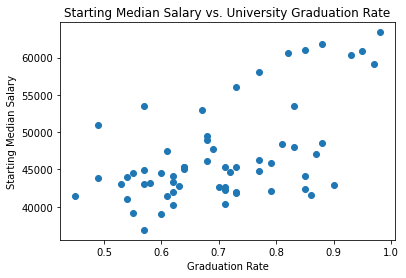

In [156]:
plt.scatter(x,y)
plt.xlabel('Graduation Rate')
plt.ylabel('Starting Median Salary')
plt.title('Starting Median Salary vs. University Graduation Rate')
plt.show()

### Visualization #2 : Median Graduation Rates Per Region Bar Plot

In [157]:
#number of universities per region --> minimizing effect of sample size
data.groupby(['Region'])['Grad_Rate'].median()

Region
California      0.625
Midwestern      0.710
Northeastern    0.850
Southern        0.660
Western         0.640
Name: Grad_Rate, dtype: float64

Text(0.5, 1.0, 'Median Graduation Rate by Region of U.S. Universities')

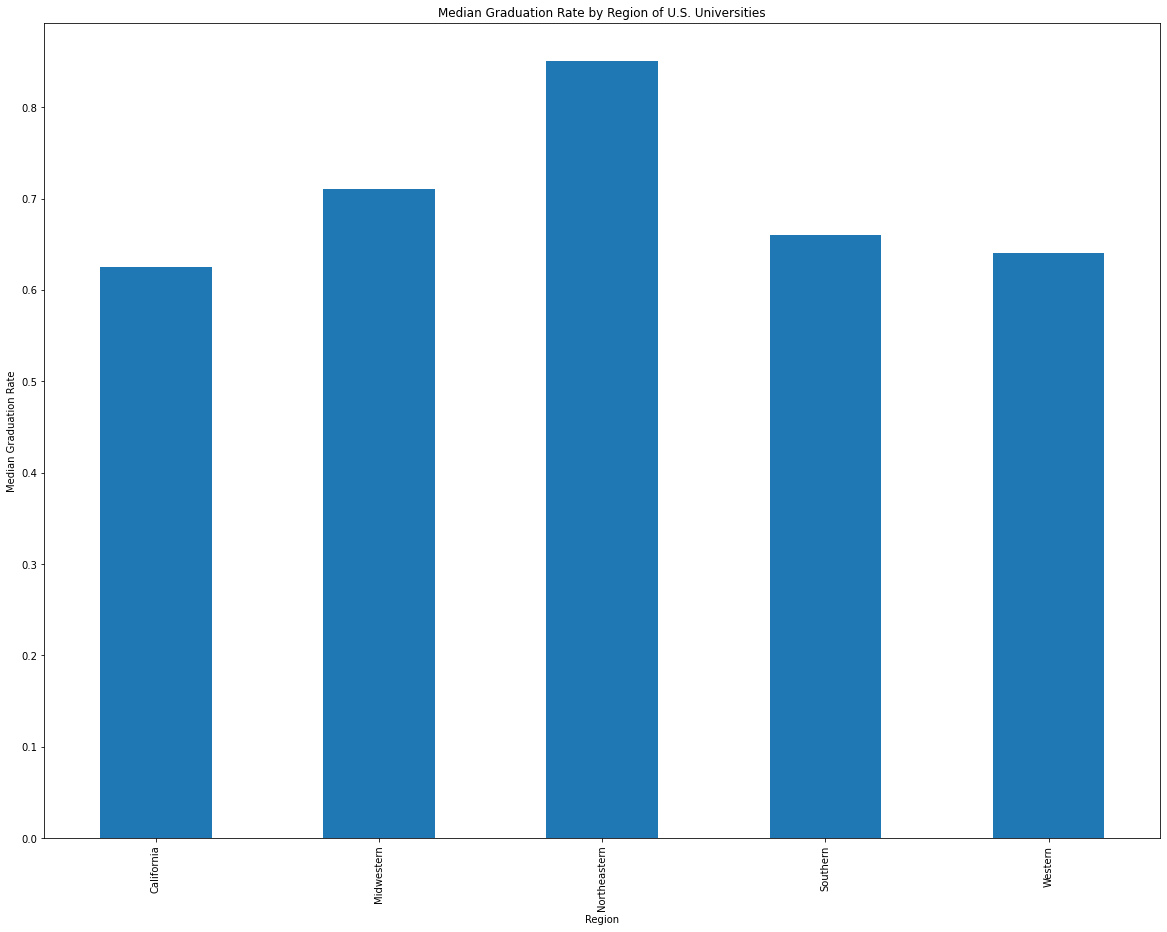

In [158]:
#side-by-side bar chart grouped on year and Region
#Values shown are sums of Units Sold
data.groupby(['Region'])['Grad_Rate'].median().plot(kind='bar', stacked=False,figsize=(20,15))
plt.ylabel('Median Graduation Rate')
plt.xlabel('Region')
plt.title('Median Graduation Rate by Region of U.S. Universities')

### Visualization #3: Average Overall SAT Scores per Region per School Type

Text(0.5, 1.0, 'Average SAT Scores per Region per School Type')

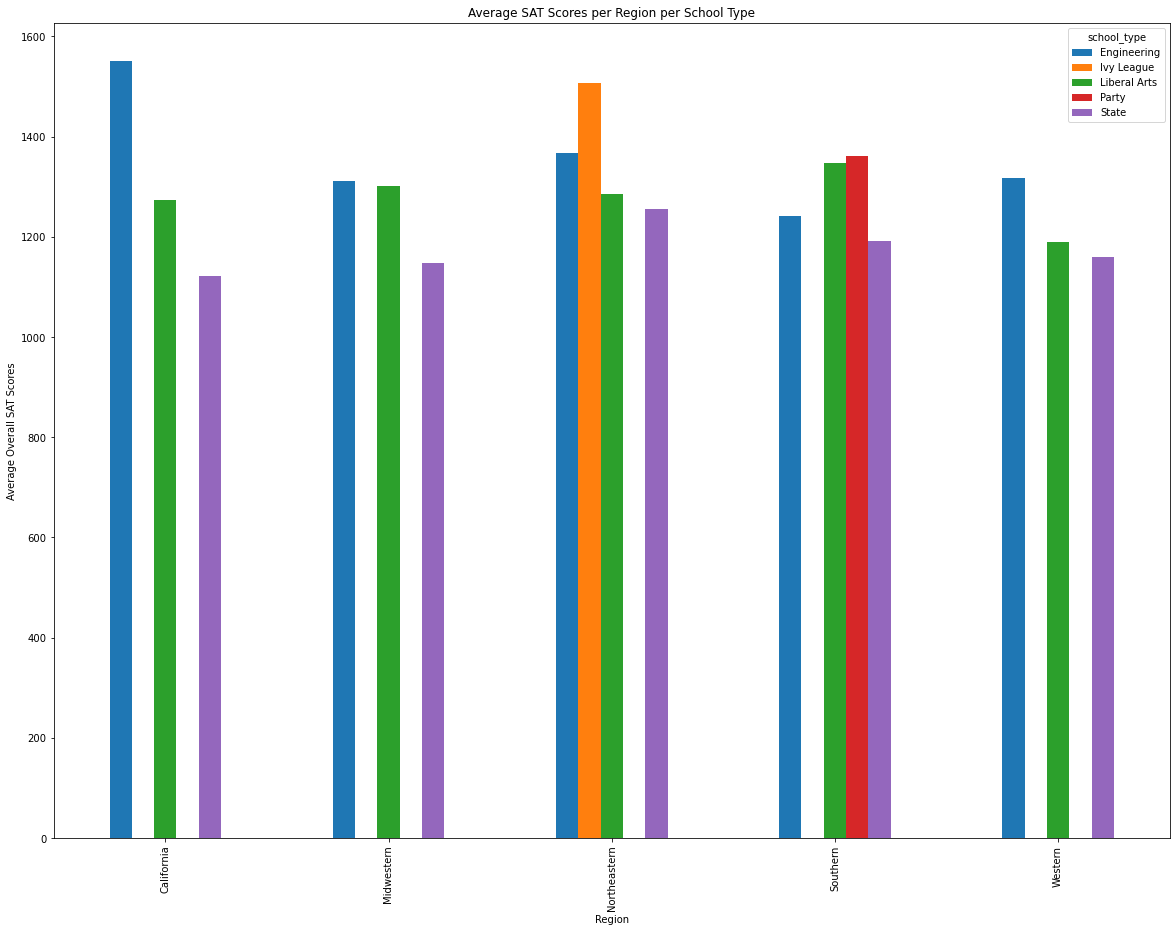

In [159]:
#side-by-side bar chart grouped on region and school type
#Values shown are average SAT Overall
data.groupby(['Region','school_type'])['sat_avg_overall'].mean().unstack().plot(kind='bar', stacked=False,figsize=(20,15))
plt.ylabel('Average Overall SAT Scores')
plt.xlabel('Region')
plt.title('Average SAT Scores per Region per School Type')

### Visualization #4: Northeastern Universities' Boxplots of Starting & Mid-Career Salaries

In [160]:
#northeastern subset
north_eastern = data[data['Region']=='Northeastern']
north_eastern.shape

(69, 59)

In [161]:
#looking at universities in Northeastern region
north_eastern[['school_name_1','Rank']].sort_values('Rank')

#contains 4 of the universities ranked in the Top 5!

,school_name_1,Rank
59,Harvard University,1.0
249,Yale University,2.0
200,University of Pennsylvania,3.0
37,Cornell University,5.0
26,Carnegie Mellon University,16.0
...,...,...
229,Ursinus College,NaN
232,Vassar College,NaN
238,Wellesley College,NaN
240,Wesleyan University,NaN


<AxesSubplot:xlabel='starting_median_salary'>

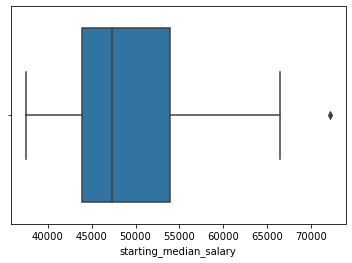

In [162]:
#boxplot for the Northeastern Universities' students' starting median salaries
sns.boxplot(x=north_eastern['starting_median_salary'])

<AxesSubplot:xlabel='midCareer_median_salary'>

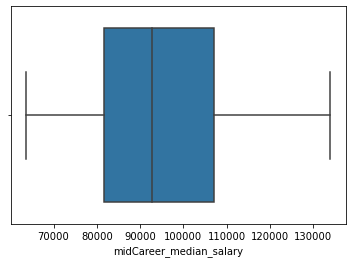

In [163]:
#boxplot for the Northeastern Universities' students' mid-career median salaries
sns.boxplot(x=north_eastern['midCareer_median_salary'])

### Visualization #5: Histogram of 4-Year Retention Rates

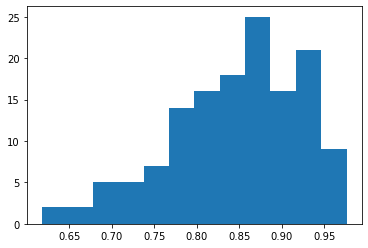

In [164]:
x = data['4_yr_retention']
plt.hist(x,bins=12)
plt.show()

### Visualization #6: Pie Chart of School Ownership Categories

Text(0.5, 1.0, 'Percentage of Universities by Ownership Type')

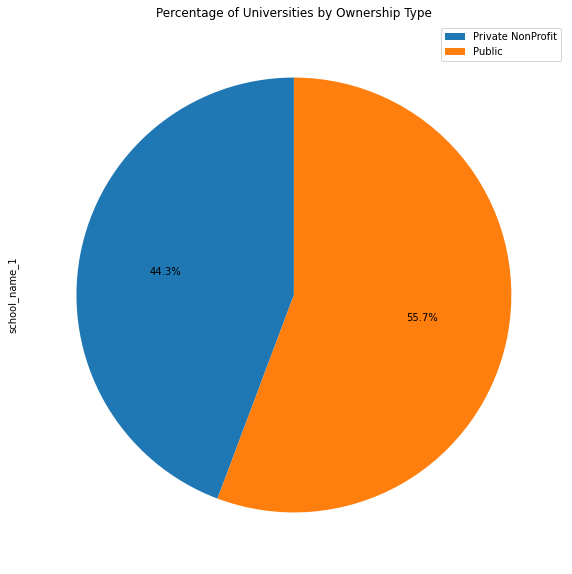

In [165]:
#pie chart with only ownership grouping
#start angle at 90 degrees -- 12 o'clock
#No labels -- just using legend

#using school name as y since it's the primary key and it holds a value for each survey respondent
data.groupby(['school_ownership_cat']).count().plot(kind='pie',y='school_name_1',figsize=(20,10), autopct='%1.1f%%',legend=True,startangle=90,labels=None)
#title for pie chart
plt.title('Percentage of Universities by Ownership Type')